Linear Regression results: 
 Slope :  [[5.09847422]] Intercept:  [0.48086838] 

Runtime of the program is 0.02207276700000005
Batch GD Results: 
 Slope :  [4.97030322]  Intercept :  [0.5410163] 
 Loss :  [1435.74048424]
Runtime of the program is 15.389130356999999
Mini_Batch GD Results: 
 Slope :  [4.9752238]  Intercept :  [0.53491815] 
 Loss :  [9388.11444396]
Runtime of the program is 15.442760795000002
SGD Results: 
 Slope :  [4.97395241]  Intercept :  [0.52331689] 
 Loss :  [91765.57090055]
Runtime of the program is 17.95132719


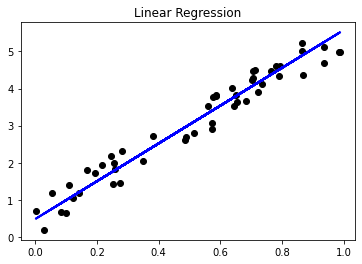

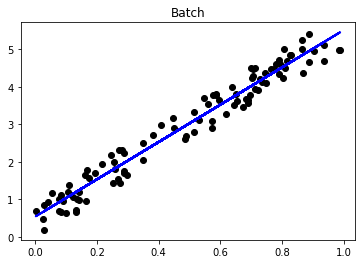

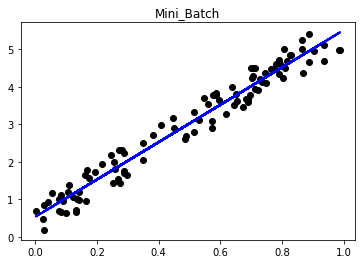

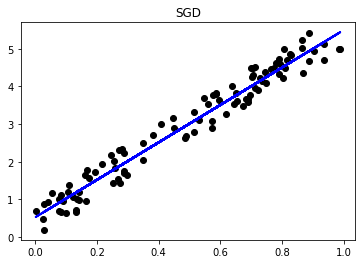

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

X = np.random.random(100).reshape(-1, 1)
c = np.random.random(100).reshape(-1, 1)
m = 5
Y = m * X + c
# no. of itiration
W = 10000
# LinearRegression_sklearn


def LinearRegression_sklearn():

    # Split the data into training/testing sets
    X_train = X[:-50]
    # print(X_train)
    X_test = X[-50:]
    # print(X_test)
    # Split the targets into training/testing sets
    Y_train = Y[:-50]
    Y_test = Y[-50:]

    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pre = regr.predict(X_test)
    # The coefficients
    print('Linear Regression results: \n', 'Slope : ',
          regr.coef_, 'Intercept: ', regr.intercept_, '\n')

    # Plot outputs
    plt.scatter(X_test, Y_test,  color='black')
    plt.plot(X_test, Y_pre, color='blue', linewidth=2)
    plt.title("Linear Regression")

# Batch


def batchGD(W):
    mr = np.random.random()
    cr = np.random.random()
    alpha = 0.01
    N = len(X)
    J = 0
    for j in range(W):
        dm = 0
        dc = 0
        for i in range(1, N):
            # slope gradiant
            dm += (2/N)*X[i]*(mr*X[i]+cr - Y[i])
            # intercept gradiant
            dc += (2/N)*(mr*X[i]+cr - Y[i])
            # cost of loss function
            J += (1/N)*(mr*X[i]+cr - Y[i])**2
        mr = mr - alpha * dm
        cr = cr - alpha * dc

    Y_batch = mr*X+cr
    plt.scatter(X, Y,  color='black')
    plt.plot(X, Y_batch, color='blue', linewidth=2)
    plt.title("Batch")
    print('Batch GD Results: \n', 'Slope : ', mr, ' Intercept : ', cr, '\n', 'Loss : ', J)
    # returen minimum slope, minimum intercept and cost of Loss function
    return mr, cr, J


def minibatchGD(W):
    mr = np.random.random()
    cr = np.random.random()
    # create batches by splitting
    g1 = np.array_split(X, 10)
    P = np.array(g1)
    g2 = np.array_split(Y, 10)
    Q = np.array(g2)
    N = len(P[0])
    alpha = 0.01
    J = 0
    for k in range(W):
        for j in range(0, len(P)):
            # send batches one by one
            x = P[j]
            y = Q[j]
            dm = 0
            dc = 0
            for i in range(N):
                # slope gradiant for each batch
                dm += (2/N)*x[i]*(mr*x[i]+cr - y[i])
                # intercept gradiant
                dc += (2/N)*(mr*x[i]+cr - y[i])
                # cost of loss function
                J += (1/N)*(mr*x[i]+cr - y[i])**2
            mr = mr - alpha * dm
            cr = cr - alpha * dc
            # d(Loss)/dm=0 for minmum slope or optimal hence break when we find optimal
    Y_minibatch = mr*X+cr
    plt.scatter(X, Y,  color='black')
    plt.plot(X, Y_minibatch, color='blue', linewidth=2)
    plt.title("Mini_Batch")
    print('Mini_Batch GD Results: \n', 'Slope : ',
          mr, ' Intercept : ', cr, '\n', 'Loss : ', J)
    # returen minimum slope, minimum intercept and cost of Loss function
    return mr, cr, J


def SGD(W):
    mr = np.random.random()
    cr = np.random.random()
    alpha = 0.01
    N = 1
    J = 0
    for j in range(W):
        for i in range(len(X)):
            dm = 0
            dc = 0
            # slope gradiant
            # here N= 1
            dm += (2/N)*X[i]*(mr*X[i]+cr - Y[i])
            # intercept gradiant
            dc += (2/N)*(mr*X[i]+cr - Y[i])
            # cost of loss function
            J += (1/N)*(mr*X[i]+cr - Y[i])**2
            mr = mr - alpha * dm
            cr = cr - alpha * dc
    Y_batch = mr*X+cr
    plt.scatter(X, Y,  color='black')
    plt.plot(X, Y_batch, color='blue', linewidth=2)
    plt.title("SGD")
    print('SGD Results: \n', 'Slope : ', mr,
          ' Intercept : ', cr, '\n', 'Loss : ', J)
    # returen minimum slope, minimum intercept and cost of Loss function
    return mr, cr, J


# LinearRegression
start = time.process_time()
plt.figure(1)
LinearRegression_sklearn()
print("Runtime of the program is", time.process_time() - start)

# Batch GD
start = time.process_time()
plt.figure(2)
slope, intercept, loss = batchGD(W)
print("Runtime of the program is", time.process_time() - start)


# Mini Batch GD
start = time.process_time()
plt.figure(3)
slope, intercept, loss = minibatchGD(W)
print("Runtime of the program is", time.process_time() - start)


# SGD
start = time.process_time()
plt.figure(4)
slope, intercept, loss = SGD(W)
print("Runtime of the program is", time.process_time() - start)


plt.show()
